# Introduction

This data represent the house prices from India and other related features that maybe useful to predict the prices. Goal will be to find the right regression model that will predict the house prices with minimum error. We will perform exploratory data analysis, feature engineering and train multiple models. After fine tuning and reviewing training results, we will select the best model to evaulate on the test set.
The steps that we are going to follow :
1. Importing data and Liberaries
2. EDA & Data Cleaning
3. Feature Scaling
4. Splitting the data
5. Model Building
a) linear regressor
b) Random Forest Regressor
c) Support Vector Regression
d) KNN Regression
e) XG Boost
6. Result
7. Model Evaluation Summary
8. Conclusion

# Importing data and Liberaries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
hpp_train = pd.read_csv("C:\\Users\\akash\\Downloads\\CAPSTONE PROJECT 1 (3)\\CAPSTONE PROJECT 1\\Property Price Prediction\\House Price train.csv")

In [3]:
hpp_train.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [4]:
hpp_train.shape

(29451, 12)

# EDA and data cleaning

In [5]:
hpp_train.columns

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE', 'TARGET(PRICE_IN_LACS)'],
      dtype='object')

In [6]:
hpp_train.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


In [7]:
hpp_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [8]:
hpp_train.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [9]:
hpp_train.drop_duplicates(inplace=True)
hpp_train.shape 

(29050, 12)

In [10]:
hpp_train["ADDRESS"]= hpp_train["ADDRESS"].str.split(",").str[-1]
hpp_train.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,Bangalore,12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,Mysore,12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,Bangalore,12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,Ghaziabad,28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,Kolkata,22.592200,88.484911,60.5


<AxesSubplot:>

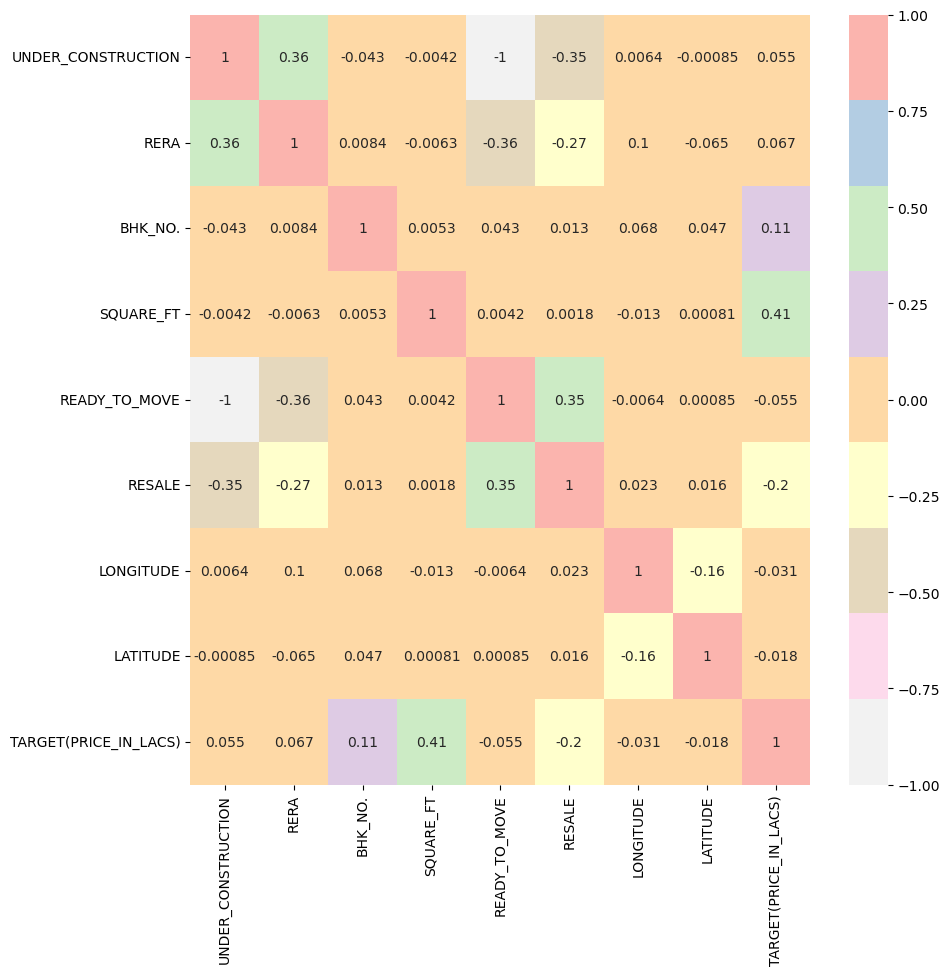

In [11]:
plt.figure(figsize = (10, 10))
sns.heatmap(data = hpp_train.corr(), annot = True, cmap = 'Pastel1_r')

<AxesSubplot:xlabel='POSTED_BY', ylabel='count'>

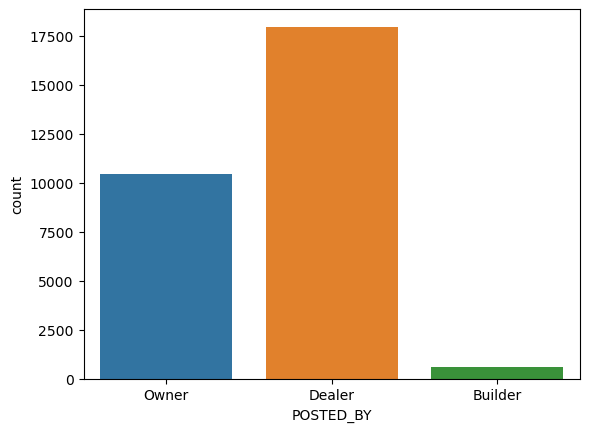

In [12]:
sns.countplot(hpp_train['POSTED_BY'])

<AxesSubplot:xlabel='RERA', ylabel='count'>

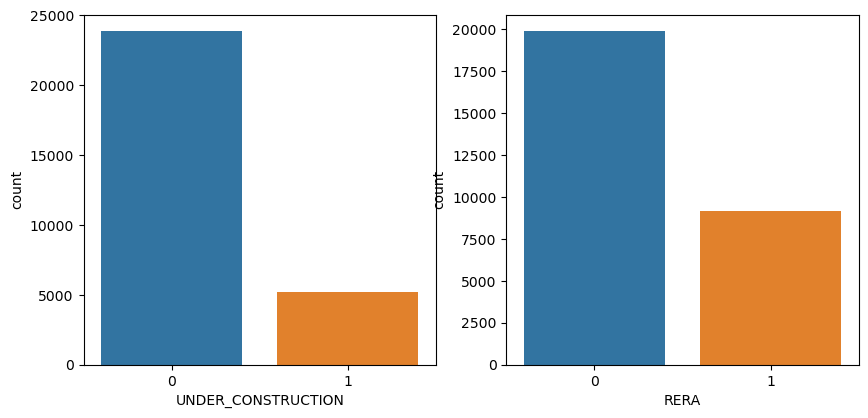

In [13]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.countplot(hpp_train['UNDER_CONSTRUCTION'])
plt.subplot(2,2,2)
sns.countplot(hpp_train['RERA'])

In [14]:
hpp_train.drop(['POSTED_BY',"BHK_OR_RK","ADDRESS"], axis=1, inplace = True)
hpp_train.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,0,0,2,1300.236407,1,1,12.969910,77.597960,55.0
1,0,0,2,1275.000000,1,1,12.274538,76.644605,51.0
2,0,0,2,933.159722,1,1,12.778033,77.632191,43.0
3,0,1,2,929.921143,1,1,28.642300,77.344500,62.5
4,1,0,2,999.009247,0,1,22.592200,88.484911,60.5


# Feature Scaling

In [15]:
x = hpp_train.drop(columns=['TARGET(PRICE_IN_LACS)'])
y = hpp_train['TARGET(PRICE_IN_LACS)']

In [16]:
x.shape

(29050, 8)

In [17]:
y.shape

(29050,)

# Splitting the data

In [18]:
train_data = hpp_train.drop(["TARGET(PRICE_IN_LACS)"],axis=1)
target = hpp_train["TARGET(PRICE_IN_LACS)"]

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(train_data, target, test_size=0.2, random_state=42)

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

# Model Building

In [22]:
score_dict={}
score_dict_test={}
def score_dict_add(score_dict,model,mse,mae,r2,y_pred):
    score_dict[model]={"R2 Score":r2,
                       "Mean Squared Error": mse,
                       "Mean Absolute Error": mae,
                       "y_pred":y_pred}
    return score_dict

### Linear Regressor

In [23]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred = regressor.predict(X_test)

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [26]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

score_dict=score_dict_add(score_dict,"Linear Regression",mse,mae,r2,y_pred)

### Random Forest Regressor

In [27]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [28]:
y_pred = regressor.predict(X_test)

In [29]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

score_dict=score_dict_add(score_dict,"Random Forest Regression",mse,mae,r2,y_pred)

### Support Vector Regression

In [30]:
from sklearn.svm import SVR
svr_regressor = SVR()
svr_regressor.fit(X_train, y_train)

SVR()

In [31]:
y_pred = svr_regressor.predict(X_test)

In [32]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

score_dict=score_dict_add(score_dict,"Support Vector Regression",mse,mae,r2,y_pred)

### KNN Regression 

In [33]:
from sklearn.neighbors import KNeighborsRegressor
k = 5  # Number of neighbors to consider
knn_regressor = KNeighborsRegressor(n_neighbors=k)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [34]:
y_pred = knn_regressor.predict(X_test)

In [35]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

score_dict=score_dict_add(score_dict,"KNN Regression",mse,mae,r2,y_pred)

### XG Boost

In [36]:
import xgboost as xgb
xgb_regressor = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [37]:
y_pred = xgb_regressor.predict(X_test)

In [38]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

score_dict=score_dict_add(score_dict,"XGBoost Regression",mse,mae,r2,y_pred)

# Results

In [45]:
score_pd=pd.DataFrame(score_dict).transpose().sort_values('Mean Squared Error')

In [46]:
score_pd.iloc[:,0:3]

,R2 Score,Mean Squared Error,Mean Absolute Error
Random Forest Regression,0.943142,31133.472893,33.142308
XGBoost Regression,0.739685,142539.898997,41.896312
Linear Regression,0.322313,371079.138611,142.556382
KNN Regression,0.260427,404965.482202,88.648301
Support Vector Regression,-0.009819,552943.49848,106.61553


# Model Evaluation Summary:

1. Random Forest has the highest R2 score, indicating the best fit to the data among the models evaluated.
2. Support Vector Regression has a negative R2 score, suggesting that it's performing worse than a horizontal line, indicating a poor fit for this model.
3. Mean Squared Error (MSE) and Mean Absolute Error (MAE) are lower for Random Forest compared to other models, indicating that Random Forest is providing more accurate predictions.

# Conclusion

Based on these results, Random Forest Regression appears to be the most suitable model for property price prediction in this context. Consider fine-tuning this model further to potentially enhance its performance.